In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitiude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
        
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities) 

603

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=974fd867c22fe5fa732db5571be46944


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list ot hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makakilo city
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | yenagoa
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | santa cruz
Processing Record 9 of Set 1 | gat
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | lander
Processing Record 12 of Set 1 | zhigalovo
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | nantucket
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | meyungs
City not found. Skipping...
Processing Record 20 of Set 1 | bundaberg
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | rikite

Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | raudeberg
Processing Record 44 of Set 4 | ixtapa
Processing Record 45 of Set 4 | novo aripuana
Processing Record 46 of Set 4 | sobolevo
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | agirish
Processing Record 49 of Set 4 | belmonte
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | xuddur
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | eureka
Processing Record 5 of Set 5 | uglich
Processing Record 6 of Set 5 | oktyabrskiy
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 5 | conakry
Processing Record 9 of Set 5 | lompoc
Processing Record 10 of Set 5 | vila velha
Processing Record 11 of Set 5 | inta
Processing Record 12 of Set 5 | birsk
Processing Record 13 of Set 5 | saint-augustin
Processing Rec

Processing Record 31 of Set 8 | paraiso
Processing Record 32 of Set 8 | high prairie
Processing Record 33 of Set 8 | laredo
Processing Record 34 of Set 8 | yokadouma
Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | halalo
City not found. Skipping...
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | saldanha
Processing Record 39 of Set 8 | koraput
Processing Record 40 of Set 8 | verkhneuralsk
Processing Record 41 of Set 8 | qaqortoq
Processing Record 42 of Set 8 | tiangua
Processing Record 43 of Set 8 | lensk
Processing Record 44 of Set 8 | misratah
Processing Record 45 of Set 8 | canico
Processing Record 46 of Set 8 | mae sai
Processing Record 47 of Set 8 | alugan
Processing Record 48 of Set 8 | manta
Processing Record 49 of Set 8 | savyntsi
Processing Record 50 of Set 8 | oudtshoorn
Processing Record 1 of Set 9 | suslovo
Processing Record 2 of Set 9 | lavrentiya
Processing Record 3 of Set 9 | kampong cham
Processing Record 4 of Set 9 |

Processing Record 20 of Set 12 | simao
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | rungata
City not found. Skipping...
Processing Record 24 of Set 12 | bograd
Processing Record 25 of Set 12 | zabaykalsk
Processing Record 26 of Set 12 | mehamn
Processing Record 27 of Set 12 | yamethin
Processing Record 28 of Set 12 | lalibela
Processing Record 29 of Set 12 | teguldet
Processing Record 30 of Set 12 | aparecida do taboado
Processing Record 31 of Set 12 | silver city
Processing Record 32 of Set 12 | sena madureira
Processing Record 33 of Set 12 | harlow
Processing Record 34 of Set 12 | njombe
Processing Record 35 of Set 12 | newport
Processing Record 36 of Set 12 | dunedin
Processing Record 37 of Set 12 | kidal
Processing Record 38 of Set 12 | luau
Processing Record 39 of Set 12 | porto belo
Processing Record 40 of Set 12 | broken hill
Processing Record 41 of Set 12 | port hawkesbury
Processing Record 42 of Set 12

In [9]:
len(city_data)

563

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Makakilo City,21.35,-158.09,80.60,69,20,4.70,US,2020-10-11 18:55:44
1,Thompson,55.74,-97.86,42.80,87,75,4.70,CA,2020-10-11 18:51:22
2,Bredasdorp,-34.53,20.04,57.20,67,90,12.75,ZA,2020-10-11 18:53:53
3,Yenagoa,4.92,6.26,76.06,91,82,3.06,NG,2020-10-11 18:55:44
4,Punta Arenas,-53.15,-70.92,55.40,47,0,42.50,CL,2020-10-11 18:55:30
5,Yellowknife,62.46,-114.35,34.00,84,90,11.41,CA,2020-10-11 18:55:44
6,Port Alfred,-33.59,26.89,55.92,62,1,6.24,ZA,2020-10-11 18:55:45
7,Santa Cruz,-17.80,-63.17,100.40,33,40,17.22,BO,2020-10-11 18:55:45
8,Gat,31.61,34.76,78.01,100,1,5.59,IL,2020-10-11 18:55:45
9,Upernavik,72.79,-56.15,37.56,75,100,4.83,GL,2020-10-11 18:55:45


In [11]:
# Reorder the columns of the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Makakilo City,US,2020-10-11 18:55:44,21.35,-158.09,80.60,69,20,4.70
1,Thompson,CA,2020-10-11 18:51:22,55.74,-97.86,42.80,87,75,4.70
2,Bredasdorp,ZA,2020-10-11 18:53:53,-34.53,20.04,57.20,67,90,12.75
3,Yenagoa,NG,2020-10-11 18:55:44,4.92,6.26,76.06,91,82,3.06
4,Punta Arenas,CL,2020-10-11 18:55:30,-53.15,-70.92,55.40,47,0,42.50
5,Yellowknife,CA,2020-10-11 18:55:44,62.46,-114.35,34.00,84,90,11.41
6,Port Alfred,ZA,2020-10-11 18:55:45,-33.59,26.89,55.92,62,1,6.24
7,Santa Cruz,BO,2020-10-11 18:55:45,-17.80,-63.17,100.40,33,40,17.22
8,Gat,IL,2020-10-11 18:55:45,31.61,34.76,78.01,100,1,5.59
9,Upernavik,GL,2020-10-11 18:55:45,72.79,-56.15,37.56,75,100,4.83


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/11/20'

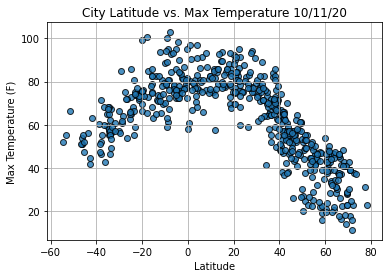

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

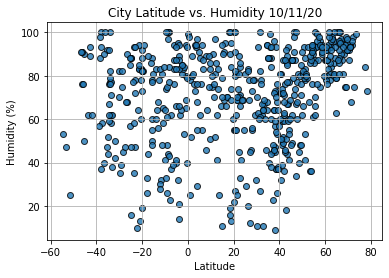

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

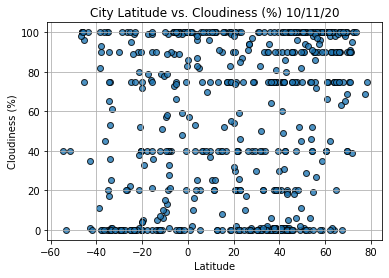

In [20]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()